In [95]:
#Import the required libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import pandas as pd
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
from textblob  import TextBlob
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [0]:
df = pd.read_csv("TweetSentiments.csv", encoding='utf-8')

In [97]:
df.head(5)

,Id,Category,Tweet
0,635769805279248384,negative,Not Available
1,635930169241374720,neutral,IOS 9 App Transport Security. Mm need to check...
2,635950258682523648,neutral,"Mar if you have an iOS device, you should down..."
3,636030803433009153,negative,@jimmie_vanagon my phone does not run on lates...
4,636100906224848896,positive,Not sure how to start your publication on iOS?...


In [0]:
tweets_text=[x for x in df['Tweet']]
corpus=[] #form an empty list called corpus
stop_words=set(stopwords.words("english"))#remove words such as will,I,and ,at etc.
for tweet in tweets_text:
  tweets_text_cln=re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|[0-9]",' ',tweet)
  tweets_text_cln=tweets_text_cln.lower()
  tweets_text_cln=tweets_text_cln.split()
  tweets_text_cln=[x for x in tweets_text_cln if not x in stop_words]
  tweets_text_cln=" ".join(tweets_text_cln)
  corpus.append(tweets_text_cln)

In [0]:
bagofwords=[]
for i in range(len(corpus)):
  words=corpus[i].split()
  bagofwords.append(words)

In [0]:
all_words=list(itertools.chain(*bagofwords))
words_freq=collections.Counter(all_words)

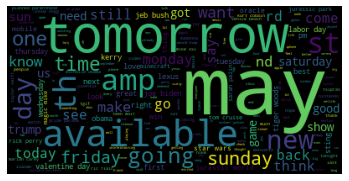

In [101]:
from wordcloud import WordCloud,STOPWORDS
def plot_wordcloud(wordcloud):
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)
word_string=" ".join(all_words)
wordcloud = WordCloud(stopwords=stopwords, relative_scaling=1.0).generate(word_string)
plot_wordcloud(wordcloud)

In [0]:
#Read the lexicon file
lex_file = open("AFINN-111.csv",encoding='cp1252')

In [0]:
lexicons = {}
records = lex_file.readlines()
for record in records:
    lexicons[record.rstrip('\n').split(",")[0]] = int(record.rstrip('\n').split(",")[1])# Using islice() + items()  

In [104]:
#For each Message
#For each word in Message
#Get the word score 
#Add all the scores and find the ploarity
strength = []
prediction = []
for message in corpus:
    score = 0
    for word in message:
        if word in (lexicons):
            score = score + lexicons[word]
    strength.append(score)
    if (score > 0):
      prediction.append('positive')
    elif(score==0):
      prediction.append('neutral')
    else:
      prediction.append('negative')

print(strength[0:10])
print(prediction[0:10])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
['neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral']


In [0]:
df['strength'] = strength
df['prediction']= prediction

In [106]:
df.head(5)

,Id,Category,Tweet,strength,prediction
0,635769805279248384,negative,Not Available,0,neutral
1,635930169241374720,neutral,IOS 9 App Transport Security. Mm need to check...,0,neutral
2,635950258682523648,neutral,"Mar if you have an iOS device, you should down...",0,neutral
3,636030803433009153,negative,@jimmie_vanagon my phone does not run on lates...,0,neutral
4,636100906224848896,positive,Not sure how to start your publication on iOS?...,0,neutral


In [107]:
pd.crosstab(df['prediction'], df['Category'])

Category,Tweet,negative,neutral,positive
prediction,,,,
neutral,1,956,2123,2888


In [108]:
df= pd.read_csv("TweetSentiments.csv", encoding='utf-8')
df.head()


,Id,Category,Tweet
0,635769805279248384,negative,Not Available
1,635930169241374720,neutral,IOS 9 App Transport Security. Mm need to check...
2,635950258682523648,neutral,"Mar if you have an iOS device, you should down..."
3,636030803433009153,negative,@jimmie_vanagon my phone does not run on lates...
4,636100906224848896,positive,Not sure how to start your publication on iOS?...


In [0]:
from sklearn.feature_extraction.text import CountVectorizer
#Create Bag of Words (BoW) using CountVectoriser
f = CountVectorizer(stop_words = 'english',dtype='float')
X = f.fit_transform(df["Tweet"])

In [0]:
#Transform the class_label to 1-0 (recode)
y=df["Category"].map({'negative':-1,'neutral':0,'positive':1})
y= np.nan_to_num(y)
from sklearn.model_selection import train_test_split
#Create train and test samples
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.25, random_state=42)

In [111]:
#Build a naive Bayesian model
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
prediction = mnb.predict(X_test)
pd.isnull(prediction).sum()

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

0

In [112]:
accuracy_score(y_test,prediction)

0.5864611260053619

In [0]:
test_df = pd.DataFrame(y_test)

In [0]:
test_df['predictions'] = prediction
test_df.columns=("category","prediction")

In [115]:
#Confusionn matrix for Naive Bayes
pd.crosstab(test_df.category, test_df.prediction)

prediction,-1.0,0.0,1.0
category,,,
-1.0,67,77,87
0.0,48,198,283
1.0,11,111,610


In [116]:
#Build SVM model
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
svc = SVC(kernel='sigmoid', gamma=1.0)
svc.fit(X_train, y_train)
prediction = svc.predict(X_test)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1.0, kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [117]:
accuracy_score(y_test,prediction)

0.4906166219839142

In [0]:
test_df = pd.DataFrame(y_test)
test_df['predictions'] = prediction
test_df.columns=("category","prediction")

In [119]:
#Confusionn matrix for SVM
pd.crosstab(test_df.category, test_df.prediction)

prediction,-1.0,0.0,1.0
category,,,
-1.0,66,70,95
0.0,86,163,280
1.0,54,175,503
